In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

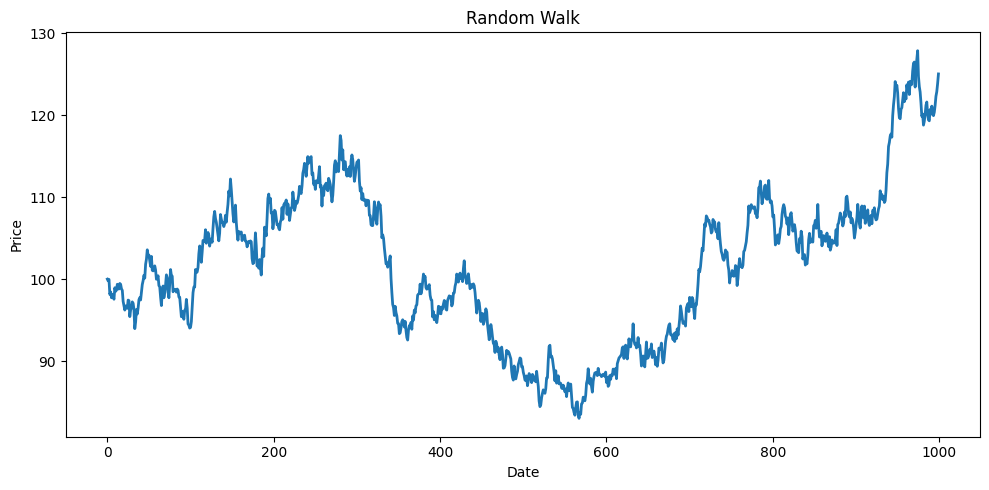

In [ ]:
N_STEPS = 1000  # number of steps
S0 = 100.0      # initial stock price
MU = 0.0005     # drift per step
SIGMA = 0.01    # volatility per step
DT = 1          # how many units each step is

def get_prices(n_steps=N_STEPS, s0=S0, mu=MU, sigma=SIGMA, dt=DT):
    prices = np.empty(n_steps)
    prices[0] = s0

    for i in range(1, n_steps):
        phi = np.random.randn()
        prices[i] = prices[i-1] * (1 + mu*dt + sigma*phi*np.sqrt(dt))

    df = pd.DataFrame({'Price': prices})

    plt.figure(figsize=(10,5))
    plt.plot(df.index, df['Price'], lw=2)
    plt.title("Random Walk")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.tight_layout()
    plt.show()

def main():
    get_prices()

main()

In [3]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\nito8\AppData\Local\Temp\ipykernel_16408\4104176199.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="max")['Close'].ffill()
[*********************100%***********************]  1 of 1 completed


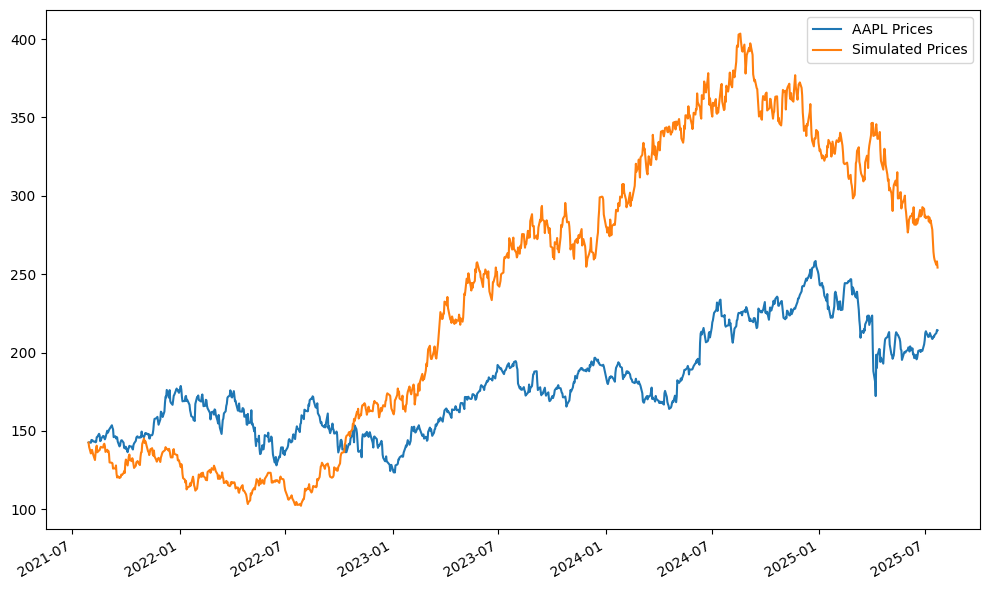

In [16]:
# This is a comparison of a stock's price and the random walk associated with its drift and volatility
TICKER = 'AAPL'
LOOKBACK = 1000    
DT = 1    

def get_data(ticker=TICKER, lookback=LOOKBACK):
    df = yf.download(ticker, period="max")['Close'].ffill()
    df = df.squeeze()
    return df.iloc[-lookback:]

def get_volatility(prices):
    log_ret = np.log(prices / prices.shift(1)).dropna()
    vol_daily = log_ret.std(ddof=1)
    return vol_daily

def get_drift(prices):
    simple_ret = prices.pct_change().dropna()
    mu_daily = simple_ret.mean()
    return mu_daily

def get_prices(s0, sigma, mu, n_steps=LOOKBACK, dt=DT):
    prices = np.empty(n_steps)
    prices[0] = s0

    for i in range(1, n_steps):
        phi = np.random.randn()
        prices[i] = prices[i-1] * (1 + mu*dt + sigma*phi*np.sqrt(dt))

    df = pd.DataFrame({'Price': prices})

    return df

def compare(prices, sim, ticker=TICKER):
    plt.figure(figsize=(10, 6))
    plt.plot(prices.index, prices.values, label=f"{ticker} Prices")
    plt.plot(sim.index, sim['Price'].values, label="Simulated Prices")
    plt.legend()
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()

def main():
    prices = get_data()
    vol = get_volatility(prices)
    mu = get_drift(prices)
    sim = get_prices(s0=prices.iloc[-LOOKBACK], sigma=vol, mu=mu)
    sim.index = prices.index
    compare(prices, sim)

main()